In [1]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
df_jan_path = "../data/raw/yellow_tripdata_2016-01.csv"
df_feb_path = "../data/raw/yellow_tripdata_2016-02.csv"
df_mar_path = "../data/raw/yellow_tripdata_2016-03.csv"

df_jan = dd.read_csv(df_jan_path, assume_missing=True)
df_feb = dd.read_csv(df_feb_path, assume_missing=True)
df_mar = dd.read_csv(df_mar_path, assume_missing=True)

In [3]:
df_jan # for show data use compute() funtion -> df_jan.compute()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
npartitions=26,,,,,,,,,,,,,,,,,,,
,float64,string,string,float64,float64,float64,float64,float64,string,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [4]:
df_jan.head(10) # head()/tail()/sample() by default call compute

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,2.0,1.10,-73.990372,40.734695,1.0,N,-73.981842,40.732407,2.0,7.5,0.5,0.5,0.0,0.0,0.3,8.8
1,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,5.0,4.90,-73.980782,40.729912,1.0,N,-73.944473,40.716679,1.0,18.0,0.5,0.5,0.0,0.0,0.3,19.3
2,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,1.0,10.54,-73.984550,40.679565,1.0,N,-73.950272,40.788925,1.0,33.0,0.5,0.5,0.0,0.0,0.3,34.3
3,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,1.0,4.75,-73.993469,40.718990,1.0,N,-73.962242,40.657333,2.0,16.5,0.0,0.5,0.0,0.0,0.3,17.3
4,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,3.0,1.76,-73.960625,40.781330,1.0,N,-73.977264,40.758514,2.0,8.0,0.0,0.5,0.0,0.0,0.3,8.8
5,2.0,2016-01-01 00:00:00,2016-01-01 00:18:30,2.0,5.52,-73.980118,40.743050,1.0,N,-73.913490,40.763142,2.0,19.0,0.5,0.5,0.0,0.0,0.3,20.3
6,2.0,2016-01-01 00:00:00,2016-01-01 00:26:45,2.0,7.45,-73.994057,40.719990,1.0,N,-73.966362,40.789871,2.0,26.0,0.5,0.5,0.0,0.0,0.3,27.3
7,1.0,2016-01-01 00:00:01,2016-01-01 00:11:55,1.0,1.20,-73.979424,40.744614,1.0,N,-73.992035,40.753944,2.0,9.0,0.5,0.5,0.0,0.0,0.3,10.3
8,1.0,2016-01-01 00:00:02,2016-01-01 00:11:14,1.0,6.00,-73.947151,40.791046,1.0,N,-73.920769,40.865578,2.0,18.0,0.5,0.5,0.0,0.0,0.3,19.3
9,2.0,2016-01-01 00:00:02,2016-01-01 00:11:08,1.0,3.21,-73.998344,40.723896,1.0,N,-73.995850,40.688400,2.0,11.5,0.5,0.5,0.0,0.0,0.3,12.8


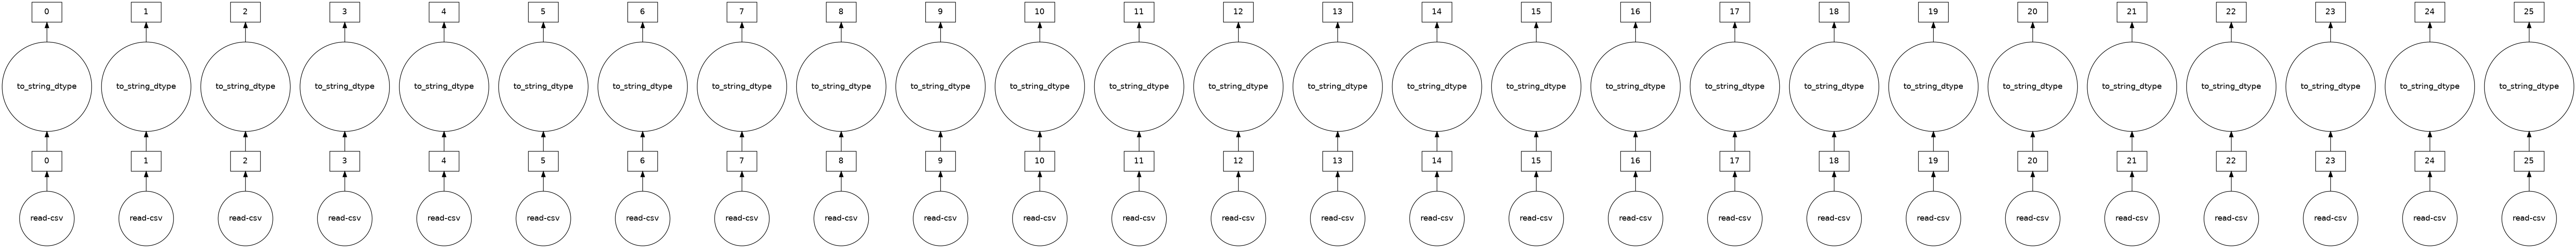

In [5]:
df_jan.visualize(tasks=True)

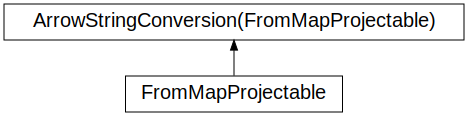

In [6]:
df_jan.visualize(tasks=False)

In [7]:
df_jan.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

In [3]:
df_final = dd.concat([df_jan,df_feb,df_mar], axis=0).drop(columns=['payment_type','extra', 'mta_tax', 'tip_amount', 'tolls_amount',
            'improvement_surcharge', 'total_amount'])
df_final

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount
npartitions=82,,,,,,,,,,,,
,float64,string,string,float64,float64,float64,float64,float64,string,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...


In [9]:
df_final.isnull().sum().compute()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
fare_amount              0
dtype: int64

In [10]:
df_final.describe().compute()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,fare_amount
count,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07
mean,1.532576e+00,1.661700e+00,5.309408e+00,-7.283942e+01,4.012605e+01,1.039150e+00,-7.290482e+01,4.016297e+01,1.257198e+01
std,4.989377e-01,1.316154e+00,4.672575e+03,9.090656e+00,5.007832e+00,5.564537e-01,8.828348e+00,4.863875e+00,9.179006e+01
min,1.000000e+00,0.000000e+00,-3.390584e+06,-1.616987e+02,-7.703949e+01,1.000000e+00,-1.616987e+02,-7.703949e+01,-9.576000e+02
25%,1.000000e+00,1.000000e+00,1.100000e+00,-7.399055e+01,4.074137e+01,1.000000e+00,-7.399009e+01,4.074001e+01,7.000000e+00
50%,2.000000e+00,1.000000e+00,1.930000e+00,-7.397922e+01,4.075640e+01,1.000000e+00,-7.397832e+01,4.075612e+01,1.000000e+01
75%,2.000000e+00,2.000000e+00,3.800000e+00,-7.396252e+01,4.076979e+01,1.000000e+00,-7.395599e+01,4.077166e+01,1.550000e+01
max,2.000000e+00,9.000000e+00,1.907263e+07,9.464387e+01,6.685682e+01,9.900000e+01,3.889659e+01,4.053167e+02,4.294967e+05


In [11]:
df_final.dtypes

VendorID                         float64
tpep_pickup_datetime     string[pyarrow]
tpep_dropoff_datetime    string[pyarrow]
passenger_count                  float64
trip_distance                    float64
pickup_longitude                 float64
pickup_latitude                  float64
RatecodeID                       float64
store_and_fwd_flag       string[pyarrow]
dropoff_longitude                float64
dropoff_latitude                 float64
fare_amount                      float64
dtype: object

In [15]:
df_final["VendorID"].value_counts().compute()

VendorID
2.0    18373797
1.0    16126062
Name: count, dtype: int64

In [16]:
df_final["VendorID"].value_counts(normalize=True).compute()

VendorID
2.0    0.532576
1.0    0.467424
Name: proportion, dtype: float64

In [19]:
passenger_count = df_final["passenger_count"].value_counts().compute()
passenger_count

passenger_count
8.0          68
0.0        1649
3.0     1383805
4.0      658123
9.0          57
2.0     4904836
6.0     1153190
1.0    24544044
7.0          72
5.0     1854015
Name: count, dtype: int64

In [ ]:
passenger_count.sort_index()

passenger_count
0.0        1649
1.0    24544044
2.0     4904836
3.0     1383805
4.0      658123
5.0     1854015
6.0     1153190
7.0          72
8.0          68
9.0          57
Name: count, dtype: int64

<Axes: xlabel='passenger_count'>

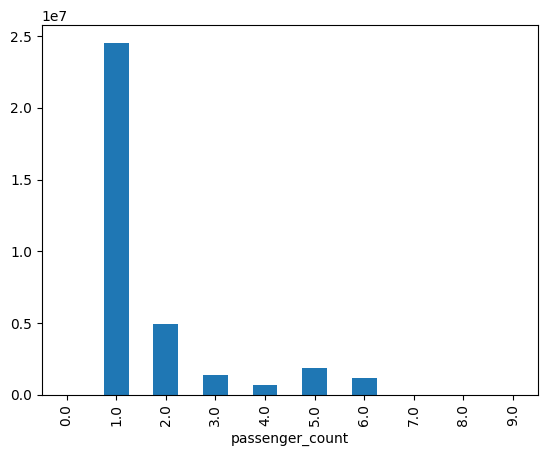

In [21]:
passenger_count.sort_index().plot(kind="bar")

<Axes: ylabel='trip_distance'>

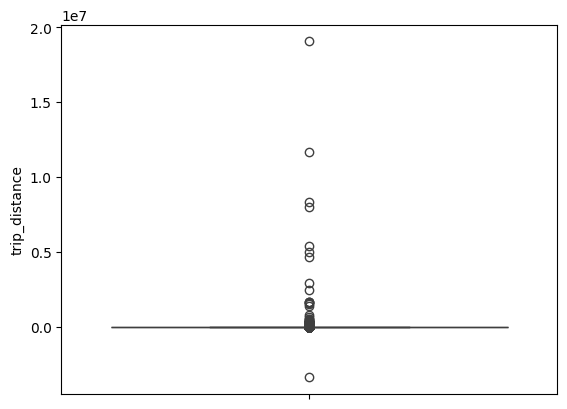

In [26]:
sb.boxplot(df_final.loc[:,"trip_distance"].compute())

In [28]:
percentile_values = np.arange(0.1, 1.0, 0.1)
percentile_values

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [ ]:
df_final.loc[:,"trip_distance"].quantile(q=0.1).compute()

0.7

In [36]:
for percentile in percentile_values:
        print(f"The trip distance value for {int(percentile * 100)}th percentile is {df_final['trip_distance'].quantile(q=percentile).compute()}")

The trip distance value for 10th percentile is 0.7
The trip distance value for 20th percentile is 0.97
The trip distance value for 30th percentile is 1.23
The trip distance value for 40th percentile is 1.56
The trip distance value for 50th percentile is 1.93
The trip distance value for 60th percentile is 2.49
The trip distance value for 70th percentile is 3.27
The trip distance value for 80th percentile is 4.6
The trip distance value for 90th percentile is 8.3


In [39]:
percentile_values = np.arange(0.90, 1.01, 0.01)
percentile_values

for percentile in percentile_values:
        print(f"The trip distance value for {int(percentile * 100)}th percentile is {df_final['trip_distance'].quantile(q=percentile).compute()}")

The trip distance value for 90th percentile is 8.3
The trip distance value for 91th percentile is 8.91
The trip distance value for 92th percentile is 9.53
The trip distance value for 93th percentile is 10.2
The trip distance value for 94th percentile is 10.95
The trip distance value for 95th percentile is 12.1
The trip distance value for 96th percentile is 14.680000000000582
The trip distance value for 97th percentile is 16.91
The trip distance value for 98th percentile is 17.95
The trip distance value for 99th percentile is 19.375500000000464
The trip distance value for 100th percentile is 19072628.8


<Axes: ylabel='fare_amount'>

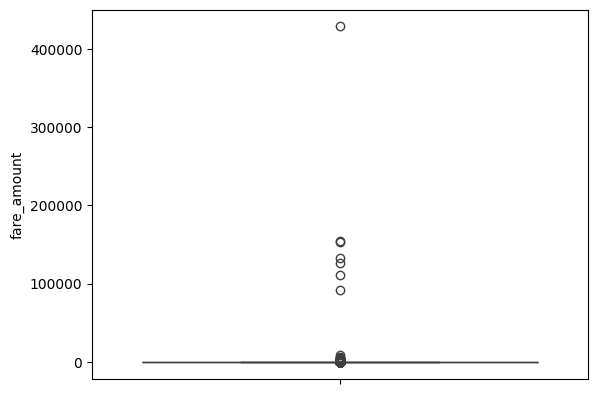

In [4]:
sb.boxplot(df_final.loc[:,"fare_amount"].compute())

In [5]:
# percentile values for fare amount

percentile_values = np.arange(0.1,1.1,0.1)
percentile_values

for percentile in percentile_values:
    print(f"The fare amount value for {int(percentile * 100)}th percentile is {df_final['fare_amount'].quantile(q=percentile).compute()}")

The fare amount value for 10th percentile is 5.0
The fare amount value for 20th percentile is 6.0
The fare amount value for 30th percentile is 7.5
The fare amount value for 40th percentile is 8.5
The fare amount value for 50th percentile is 10.0
The fare amount value for 60th percentile is 11.5
The fare amount value for 70th percentile is 14.0
The fare amount value for 80th percentile is 18.0
The fare amount value for 90th percentile is 27.0
The fare amount value for 100th percentile is 429496.72


In [6]:
percentile_values = np.arange(0.90,1.01,0.01)
percentile_values

for percentile in percentile_values:
    print(f"The fare amount value for {int(percentile * 100)}th percentile is {df_final['fare_amount'].quantile(q=percentile).compute()}")


The fare amount value for 90th percentile is 27.0
The fare amount value for 91th percentile is 29.0
The fare amount value for 92th percentile is 30.5
The fare amount value for 93th percentile is 33.0
The fare amount value for 94th percentile is 35.5
The fare amount value for 95th percentile is 40.0
The fare amount value for 96th percentile is 49.5
The fare amount value for 97th percentile is 52.0
The fare amount value for 98th percentile is 52.0
The fare amount value for 99th percentile is 52.0
The fare amount value for 100th percentile is 429496.72


In [7]:
rate_code_ids = (
    df_final["RatecodeID"]
    .value_counts()
    .compute()
)

In [15]:
rate_code_ids.sort_index()

RatecodeID
1.0     33627000
2.0       697595
3.0        56169
4.0        14459
5.0       103481
6.0          320
99.0         835
Name: count, dtype: int64

In [9]:
display(df_final.columns,df_final.dtypes)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount'],
      dtype='object')

VendorID                         float64
tpep_pickup_datetime     string[pyarrow]
tpep_dropoff_datetime    string[pyarrow]
passenger_count                  float64
trip_distance                    float64
pickup_longitude                 float64
pickup_latitude                  float64
RatecodeID                       float64
store_and_fwd_flag       string[pyarrow]
dropoff_longitude                float64
dropoff_latitude                 float64
fare_amount                      float64
dtype: object

In [28]:
df_final["tpep_pickup_datetime"] = dd.to_datetime(df_final["tpep_pickup_datetime"],yearfirst = True, format = "mixed")
df_final["tpep_dropoff_datetime"] = dd.to_datetime(df_final["tpep_dropoff_datetime"],yearfirst = True, format = "mixed")


In [29]:

df_final["pickup_months"] = df_final["tpep_pickup_datetime"].dt.month
df_final["pickup_day_of_week"] = df_final["tpep_pickup_datetime"].dt.dayofweek
df_final["pickup_hours"] = df_final["tpep_pickup_datetime"].dt.hour


In [30]:
df_final.dtypes

VendorID                         float64
tpep_pickup_datetime      datetime64[ns]
tpep_dropoff_datetime     datetime64[ns]
passenger_count                  float64
trip_distance                    float64
pickup_longitude                 float64
pickup_latitude                  float64
RatecodeID                       float64
store_and_fwd_flag       string[pyarrow]
dropoff_longitude                float64
dropoff_latitude                 float64
fare_amount                      float64
pickup_months                      int32
pickup_day_of_week                 int32
pickup_hours                       int32
dtype: object

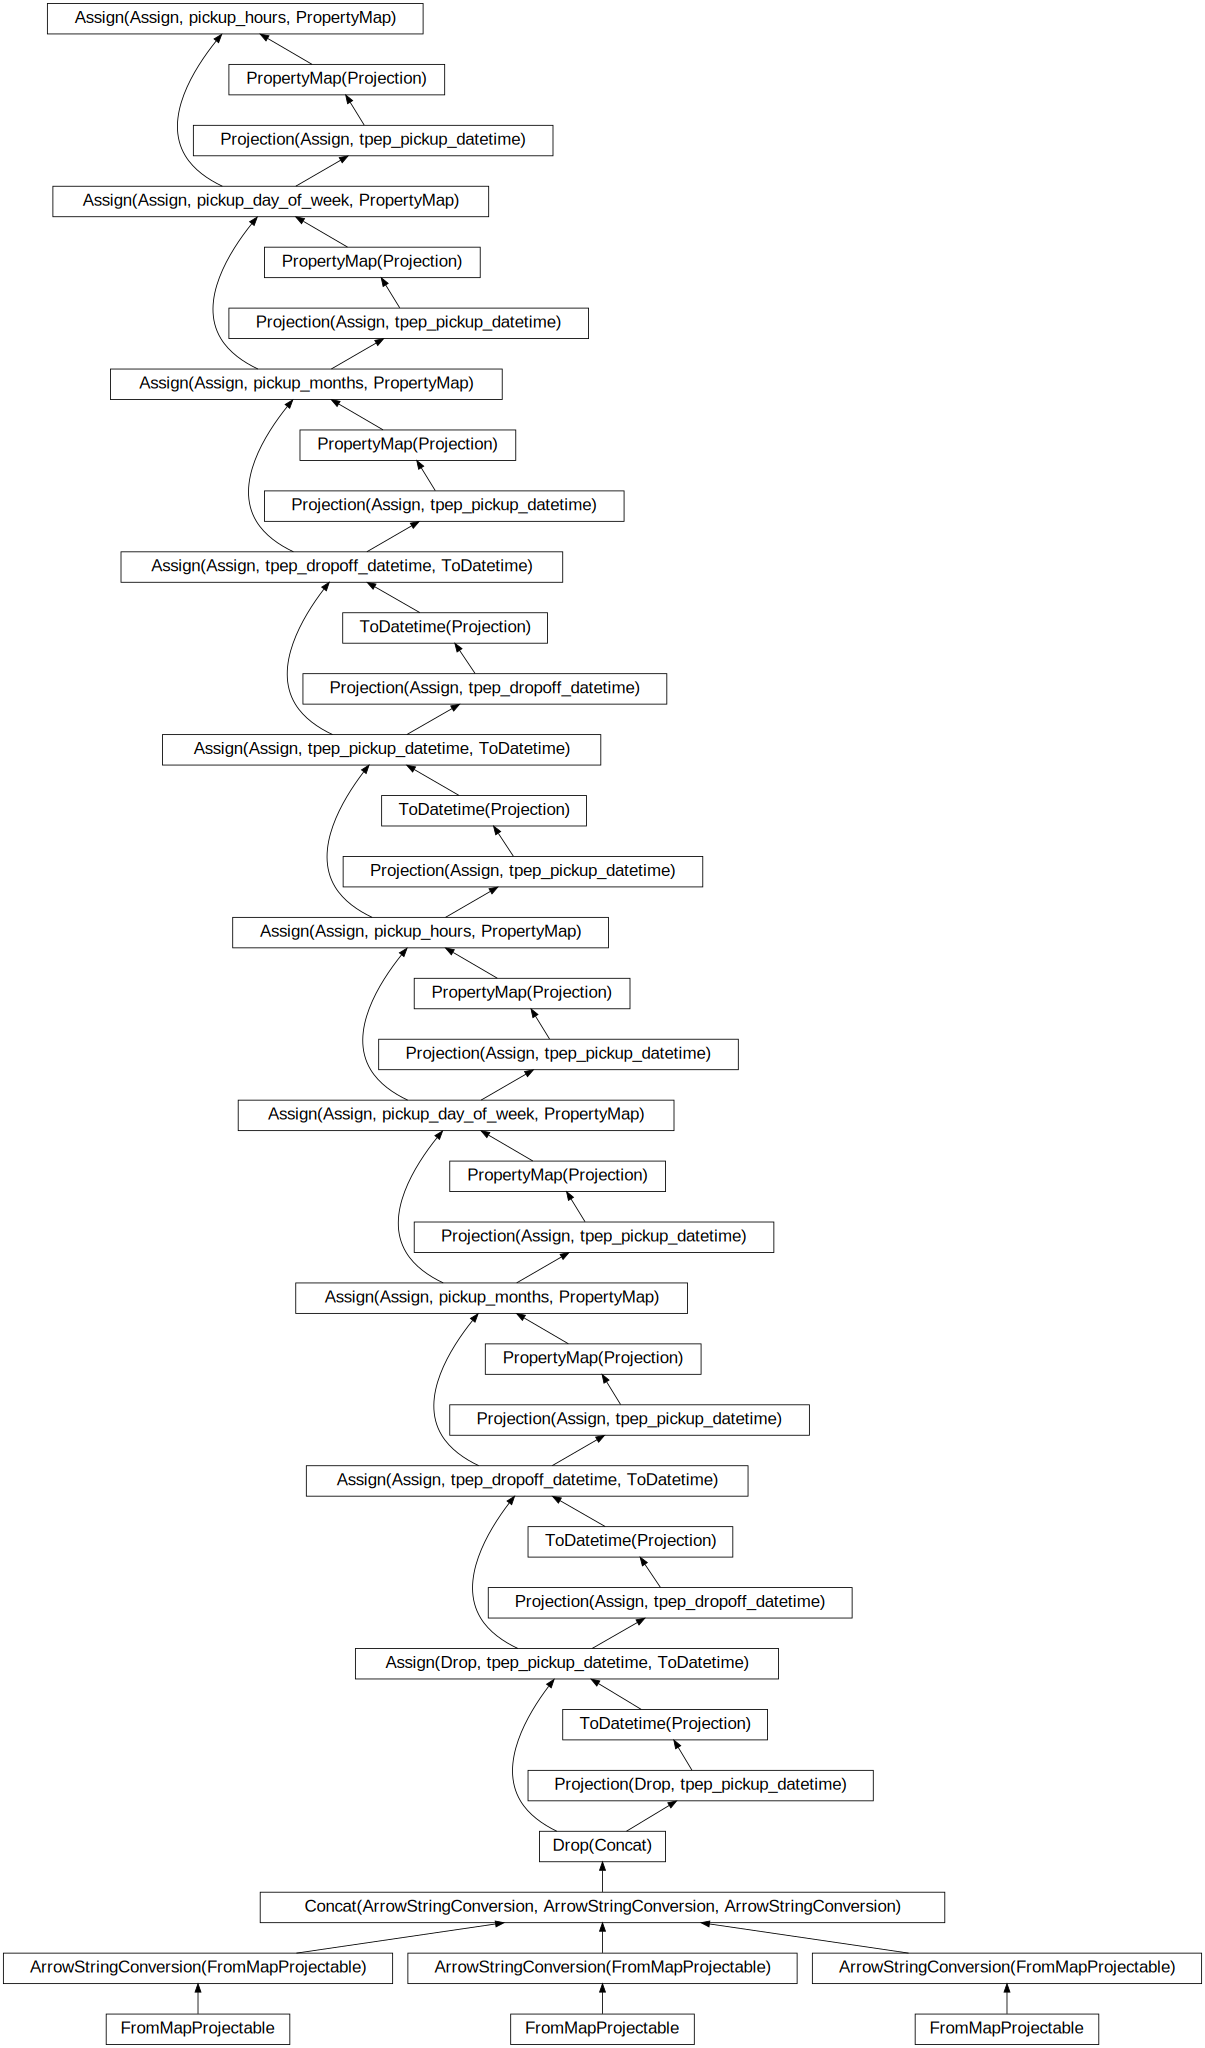

In [31]:
df_final.visualize()

In [32]:
df_final

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,pickup_months,pickup_day_of_week,pickup_hours
npartitions=82,,,,,,,,,,,,,,,
,float64,datetime64[ns],datetime64[ns],float64,float64,float64,float64,float64,string,float64,float64,float64,int32,int32,int32
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [33]:
df_final.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,pickup_months,pickup_day_of_week,pickup_hours
0,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,2.0,1.10,-73.990372,40.734695,1.0,N,-73.981842,40.732407,7.5,1,4,0
1,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,5.0,4.90,-73.980782,40.729912,1.0,N,-73.944473,40.716679,18.0,1,4,0
2,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,1.0,10.54,-73.984550,40.679565,1.0,N,-73.950272,40.788925,33.0,1,4,0
3,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,1.0,4.75,-73.993469,40.718990,1.0,N,-73.962242,40.657333,16.5,1,4,0
4,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,3.0,1.76,-73.960625,40.781330,1.0,N,-73.977264,40.758514,8.0,1,4,0
5,2.0,2016-01-01 00:00:00,2016-01-01 00:18:30,2.0,5.52,-73.980118,40.743050,1.0,N,-73.913490,40.763142,19.0,1,4,0
6,2.0,2016-01-01 00:00:00,2016-01-01 00:26:45,2.0,7.45,-73.994057,40.719990,1.0,N,-73.966362,40.789871,26.0,1,4,0
7,1.0,2016-01-01 00:00:01,2016-01-01 00:11:55,1.0,1.20,-73.979424,40.744614,1.0,N,-73.992035,40.753944,9.0,1,4,0
8,1.0,2016-01-01 00:00:02,2016-01-01 00:11:14,1.0,6.00,-73.947151,40.791046,1.0,N,-73.920769,40.865578,18.0,1,4,0
9,2.0,2016-01-01 00:00:02,2016-01-01 00:11:08,1.0,3.21,-73.998344,40.723896,1.0,N,-73.995850,40.688400,11.5,1,4,0


In [ ]:
pickup_every_2_days = (
    df_final.set_index("tpep_pickup_datetime")
    .resample("2D")
    .size()
    .compute()
    )

In [ ]:
pickup_every_2_days

tpep_pickup_datetime
2016-01-01    657868
2016-01-03    619049
2016-01-05    691767
2016-01-07    756964
2016-01-09    757613
2016-01-11    710041
2016-01-13    791563
2016-01-15    813188
2016-01-17    720637
2016-01-19    767292
2016-01-21    819816
2016-01-23    237899
2016-01-25    609742
2016-01-27    742506
2016-01-29    849408
2016-01-31    702828
2016-02-02    735183
2016-02-04    804152
2016-02-06    801686
2016-02-08    711058
2016-02-10    824606
2016-02-12    882961
2016-02-14    752847
2016-02-16    750818
2016-02-18    831437
2016-02-20    796911
2016-02-22    742546
2016-02-24    813699
2016-02-26    878733
2016-02-28    714089
2016-03-01    780055
2016-03-03    862289
2016-03-05    836365
2016-03-07    721623
2016-03-09    791182
2016-03-11    867372
2016-03-13    750760
2016-03-15    781465
2016-03-17    836420
2016-03-19    831829
2016-03-21    711073
2016-03-23    788774
2016-03-25    803650
2016-03-27    690211
2016-03-29    763829
2016-03-31    394055
Freq: 2D, dty

In [ ]:
pickup_every_3_days = (
    df_final.set_index("tpep_pickup_datetime")
    .resample("3D")
    .size()
    .compute()
    )

In [ ]:
pickup_every_3_days

tpep_pickup_datetime
2016-01-01     960746
2016-01-04    1007938
2016-01-07    1162789
2016-01-10    1061829
2016-01-13    1192852
2016-01-16    1132536
2016-01-19    1166946
2016-01-22     658061
2016-01-25     968922
2016-01-28    1232734
2016-01-31    1065990
2016-02-03    1176173
2016-02-06    1144752
2016-02-09    1192598
2016-02-12    1285409
2016-02-15    1101217
2016-02-18    1256220
2016-02-21    1114674
2016-02-24    1251497
2016-02-27    1155024
2016-03-01    1208179
2016-03-04    1270530
2016-03-07    1106194
2016-03-10    1273983
2016-03-13    1134075
2016-03-16    1234570
2016-03-19    1176151
2016-03-22    1155525
2016-03-25    1149227
2016-03-28    1108463
2016-03-31     394055
Freq: 3D, dtype: int64

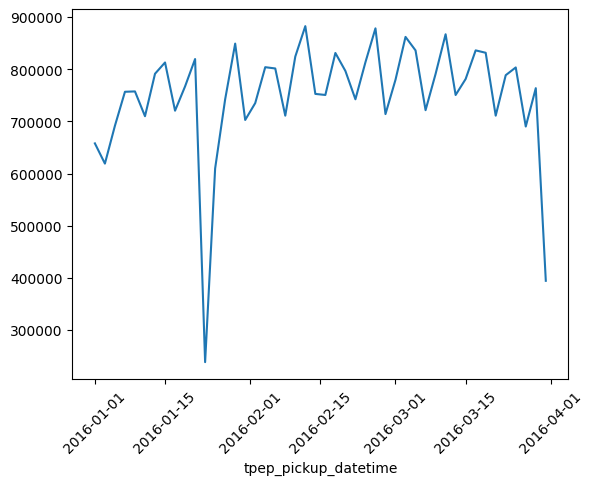

In [ ]:
sb.lineplot(pickup_every_2_days)
plt.xticks(rotation=45)
plt.show()

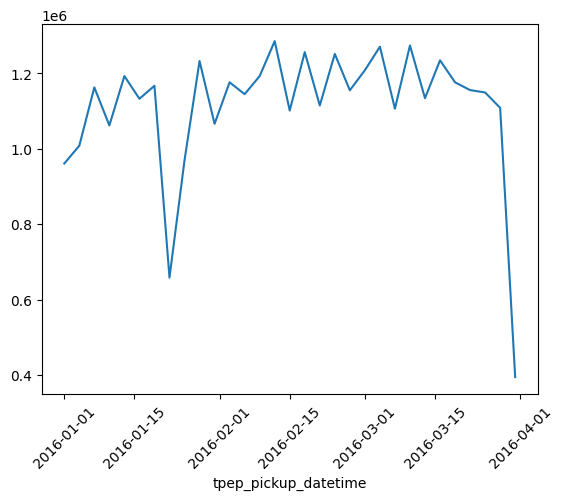

In [ ]:
sb.lineplot(pickup_every_3_days)
plt.xticks(rotation=45)
plt.show()

In [ ]:
pickups_each_hour = (
    df_final
    .groupby(["pickup_hours","pickup_day_of_week"])["VendorID"]
    .count()
    .compute()
)

In [ ]:
pickups_each_hour

pickup_hours  pickup_day_of_week
4             2                      29498
              3                      32480
5             2                      49844
6             2                     136330
              3                     138392
                                     ...  
23            5                     299024
0             0                     100903
              1                     101299
19            0                     291911
23            0                     154325
Name: VendorID, Length: 168, dtype: int64